   book_stock_0  case_size  case_weight  store_life     price      freq  \
0      0.309124   0.066787     0.000000    0.332521  0.058882  0.081851   
1      0.353862   0.110186     0.014141    0.183649  0.241486  0.250265   
2      0.317169   0.043406     0.000000    0.003590  0.893731  0.079222   
3      0.432924   0.059134     0.023364    0.054174  0.132523  0.697323   
4      0.282390   0.001063     0.013094    0.001263  0.544779  0.000000   

   rem_life  last_count_1  scan_freq  shelf_cap  ...  book_stock_2    counts  \
0  0.306519      0.093523   0.450998   0.078236  ...      0.478851  0.102392   
1  0.193292      0.247673   0.000000   0.081874  ...      0.485379  0.031260   
2  0.987711      0.543073   0.232471   0.052502  ...      0.474031  0.063054   
3  0.101725      0.579191   0.000000   0.161566  ...      0.521249  0.000000   
4  0.053647      0.450560   0.042113   0.012922  ...      0.453709  0.040997   

     change  rejection  SKU_l1  SKU_l2  SKU_l3  fresh  size  stock_e

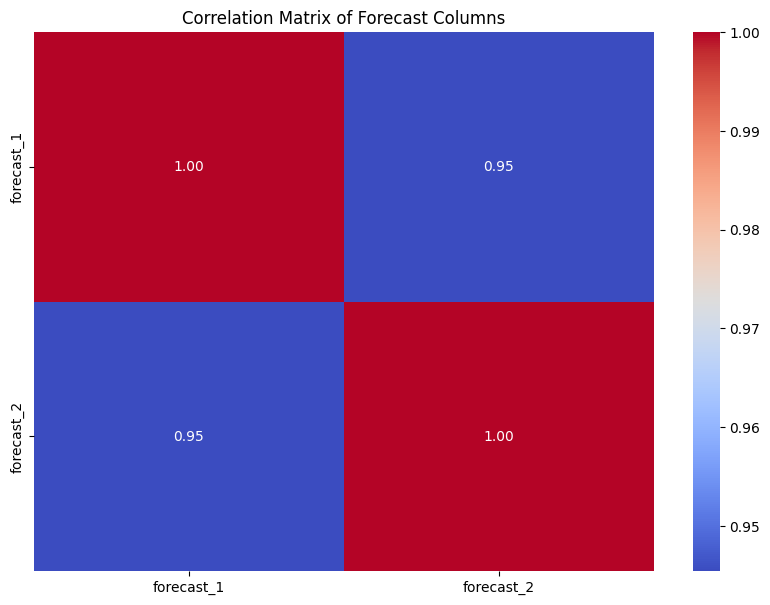

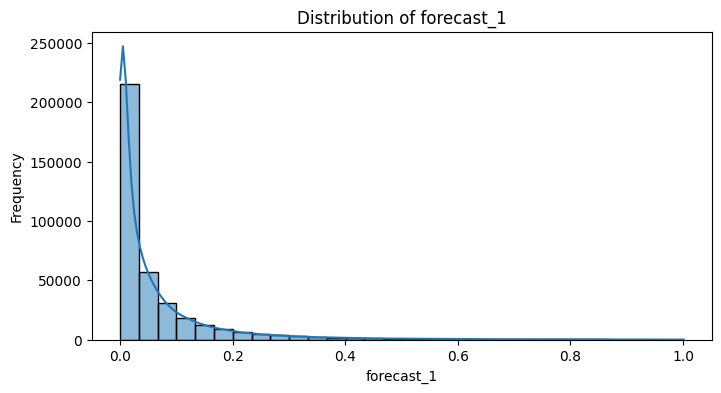

In [ ]:
# Code to do Data, exploration and analysis stock forecast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel data
data = pd.read_excel("forecast_data.xlsx")

# Display first few rows
print(data.head())

# Descriptive statistics
print("\nDescriptive Statistics:\n", data.describe(include='all'))

# Class distribution
print('\nBalance of positive and negative error classes (%): \n',
      data['stock_error'].value_counts(normalize=True) * 100)

# 1. Check Missing Values and Data Integrity
print("\nMissing Values:\n", data.isnull().sum())

# Identify forecast-related columns
forecast_cols = [col for col in data.columns if 'forecast' in col.lower()]

# 2. Correlation Matrix Visualization
if forecast_cols:
    plt.figure(figsize=(10, 7))
    sns.heatmap(data[forecast_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Forecast Columns')
    plt.show()
else:
    print("No forecast-related columns found for correlation matrix.")

# 3. Distribution Analysis
if forecast_cols:
    for col in forecast_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# 4. Boxplot for Outlier Detection
if forecast_cols:
    for col in forecast_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='stock_error', y=col, data=data)
        plt.title(f'Boxplot of {col} by Stock Error')
        plt.show()

# Pairplot to visualize forecast columns
if forecast_cols:
    sns.pairplot(data, vars=forecast_cols, hue='stock_error')
    plt.suptitle('Pairplot of Forecast Columns by Stock Error', y=1.02)
    plt.show()
else:
    print("No forecast-related columns found.")